#다중 클래스 분류

In [ ]:
import numpy as np
class M_L_C:
    def __init__(self,units=10,batch_size=32,learning_rate=0.1,l1=0,l2=0):
        self.units=units
        self.batch_size=batch_size
        self.w1=None
        self.w2=None
        self.b1=None
        self.b2=None
        self.a1=None
        self.losses=[]
        self.val_losses=[]
        self.lr=learning_rate
        self.l1=l1
        self.l2=l2

    def forpass(self,x):
        z1=(x@self.w1)+self.b1
        self.a1=self.sigmoid(z1)

        z2=(self.a1@self.w2)+self.b2
        return z2

    def sigmoid(self,z):
        z = np.clip(z,-100,None)
        a = 1/(1+np.exp(-z))
        return a

    def backprop(self,x,err):
        m =len(x)

        w2_g=(self.a1.T@err)/m
        b2_g=np.sum(err)/m

        h_err = (err@self.w2.T) *self.a1*(1-self.a1)

        w1_g=(x.T@h_err)/m
        b1_g=np.sum(h_err,axis=0)/m
        return w1_g,b1_g,w2_g,b2_g

    def init_w(self,n_f,n_c):
        self.w1 = np.random.normal(0,1,(n_f,self.units))
        self.w2 = np.random.normal(0,1,(self.units,n_c))
        self.b1 = np.zeros(self.units)
        self.b2 = np.zeros(n_c)

    def softmax(self,z):
        z = np.clip(z,-100,None)
        exp_z = np.exp(z)
        out_v = exp_z/np.sum(exp_z,axis=1).reshape(-1,1)
        return out_v

    def fit(self,x,y,epochs=100,val_x=None,val_y=None):
        np.random.seed(42)
        self.init_w(x.shape[1],y.shape[1])
        for i in range(epochs):
            loss=0
            print(i+1,'횟수 동작')
            for x_b,y_b in self.gen_batch(x,y):
                a = self.training(x_b,y_b)
                a = np.clip(a,1e-10,1-1e-10)
                loss += np.sum(-y_b*np.log(a))
                self.losses.append((loss+self.reg_loss())/len(x))
                self.update_val_loss(val_x,val_y)

    def gen_batch(self,x,y):
        x_l = len(x)
        bins = x_l//self.batch_size
        if x_l%self.batch_size:
            bins+=1
        idx = np.random.permutation(np.arange(len(x)))
        x=x[idx]
        y=y[idx]
        for i in range(bins):
            st = self.batch_size*i
            end = self.batch_size*(i+1)
            yield x[st:end],y[st:end]

    def training(self,x,y):
        m = len(x)
        z = self.forpass(x)
        a = self.softmax(z)

        err = -(y-a)

        w1_g,b1_g,w2_g,b2_g = self.backprop(x,err)
        w1_g = (self.l1 *np.sign(self.w1)+self.l2*self.w1)/m
        w2_g = (self.l1 *np.sign(self.w2)+self.l2*self.w2)/m

        self.w1 -= self.lr*w1_g
        self.b1 -= self.lr*b1_g

        self.w2 -= self.lr*w2_g
        self.b2 -= self.lr*b2_g

        return a

    def reg_loss(self):
        return self.l1 * (np.sum(np.abs(self.w1))+np.sum(np.abs(self.w2)))+self.l2/2 *((np.sum(self.w1**2)+np.sum(self.w2**2)))

    def update_val_loss(self,val_x,val_y):
        z = self.forpass(val_x)
        a = self.softmax(z)
        a = np.clip(a,1e-10,1-1e-10)
        val_loss = np.sum(-val_y*np.log(a))
        self.val_losses.append((val_loss+self.reg_loss())/len(val_y))

    def predict(self, x):
        z = self.forpass(x)
        idx = np.argmax(z, axis = 1)
        return idx

    def score(self, x, y):
        return np.mean(self.predict(x) == np.argmax(y, axis = 1))



In [ ]:
np.argmax(np.array([[1,3,5,2,3], [1,2,5,3,4]]), axis = 1)

array([2, 2])

In [ ]:
from keras.datasets import mnist
(x_data, y_data), (test_x, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(x_data, y_data, stratify = y_data, test_size = 0.2, random_state = 42)

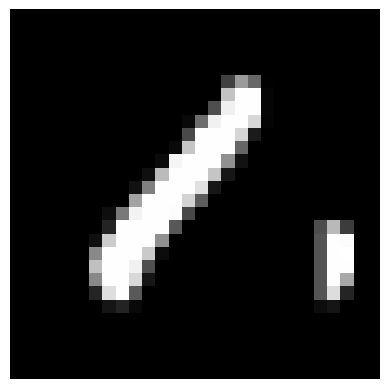

1


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_x[0], cmap = 'gray')
plt.axis('off')
plt.show()
print(train_y[0])

In [ ]:
import numpy as np

class_n = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
np.bincount(train_y)

array([4738, 5394, 4766, 4905, 4674, 4337, 4734, 5012, 4681, 4759])

In [ ]:
train_x = train_x / 255
test_x = test_x / 255
val_x = val_x / 255

In [ ]:
train_x = train_x.reshape(-1, 28 * 28)
test_x = test_x.reshape(-1, 28 * 28)
val_x = val_x.reshape(-1, 28 * 28)

In [ ]:
from keras.utils import to_categorical
to_categorical([0, 1, 3])

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)
val_y = to_categorical(val_y)

In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape, val_x.shape, val_y.shape

((48000, 784),
 (48000, 10),
 (10000, 784),
 (10000, 10),
 (12000, 784),
 (12000, 10))

In [ ]:
m = M_L_C(units = 100, batch_size = 256)
m.fit(train_x, train_y, 100, val_x, val_y)

IndexError: ignored

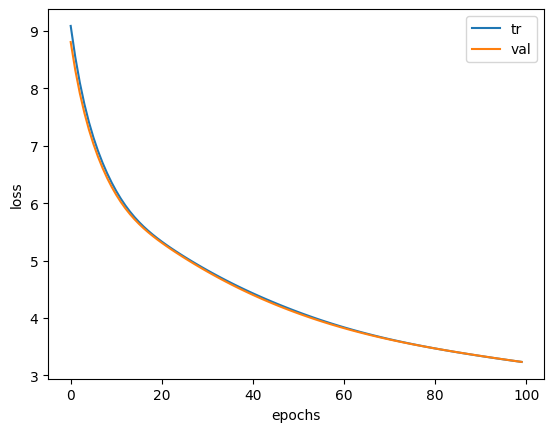

In [ ]:
plt.plot(m.losses)
plt.plot(m.val_losses)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["tr", "val"])
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.losses import categorical_crossentropy, sparse_categorical_crossentropy

In [ ]:
m = Sequential()
m.add(Dense(100, activation = 'sigmoid', input_shape = (784,)))
m.add(Dense(10, activation = 'softmax'))
m.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
m.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hy = m.fit(train_x, train_y, validation_data = (val_x, val_y), epochs = 40, verbose = 2, batch_size = 256)

Epoch 1/40
188/188 - 2s - loss: 2.2051 - accuracy: 0.3678 - val_loss: 2.0769 - val_accuracy: 0.5847 - 2s/epoch - 9ms/step
Epoch 2/40
188/188 - 1s - loss: 1.9774 - accuracy: 0.6415 - val_loss: 1.8787 - val_accuracy: 0.6705 - 1s/epoch - 5ms/step
Epoch 3/40
188/188 - 1s - loss: 1.7843 - accuracy: 0.6974 - val_loss: 1.6922 - val_accuracy: 0.7088 - 1s/epoch - 8ms/step
Epoch 4/40
188/188 - 2s - loss: 1.6048 - accuracy: 0.7299 - val_loss: 1.5216 - val_accuracy: 0.7322 - 2s/epoch - 9ms/step
Epoch 5/40
188/188 - 1s - loss: 1.4432 - accuracy: 0.7504 - val_loss: 1.3707 - val_accuracy: 0.7626 - 1s/epoch - 5ms/step
Epoch 6/40
188/188 - 1s - loss: 1.3027 - accuracy: 0.7723 - val_loss: 1.2413 - val_accuracy: 0.7818 - 996ms/epoch - 5ms/step
Epoch 7/40
188/188 - 1s - loss: 1.1833 - accuracy: 0.7902 - val_loss: 1.1324 - val_accuracy: 0.7918 - 1s/epoch - 5ms/step
Epoch 8/40
188/188 - 1s - loss: 1.0835 - accuracy: 0.8019 - val_loss: 1.0413 - val_accuracy: 0.8074 - 1s/epoch - 5ms/step
Epoch 9/40
188/188 - 

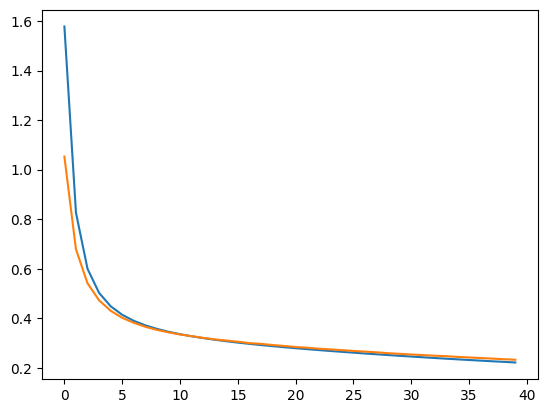

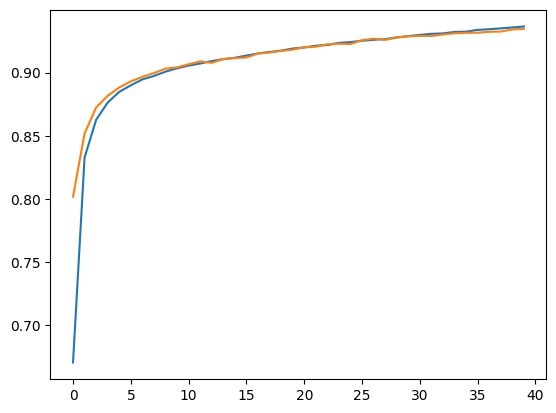

In [ ]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.show()
plt.plot(hy.history["accuracy"])
plt.plot(hy.history["val_accuracy"])
plt.show()

In [ ]:
from keras.datasets import fashion_mnist
(train_x, train_y), (test_x,_test_y) = fashion_mnist.load_data()

In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000, 10))

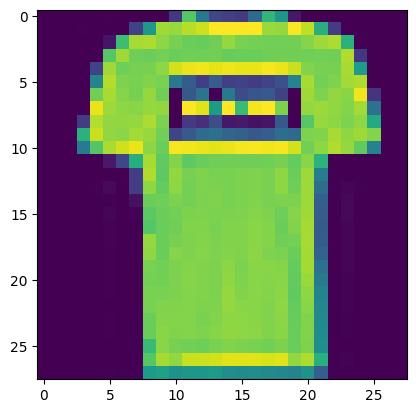

In [ ]:
plt.imshow(train_x[1])

In [ ]:
np.unique(train_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
정답 = ['티셔츠', '바지', '스웨터', '원피스', '코트', '샌들', '셔츠',' 신발', '가방', '구두']

0


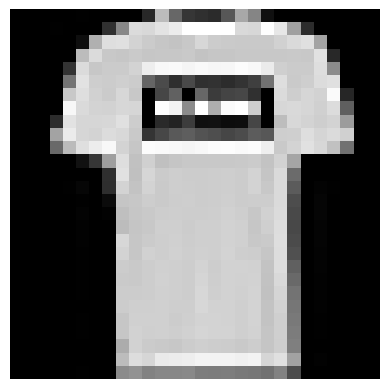

1


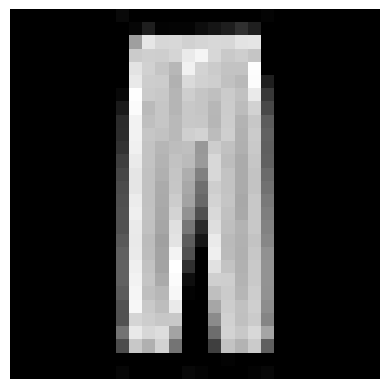

2


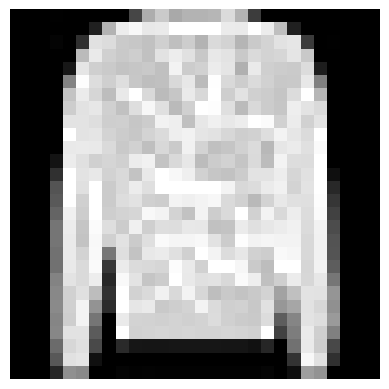

3


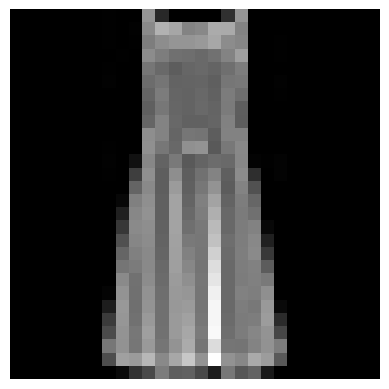

4


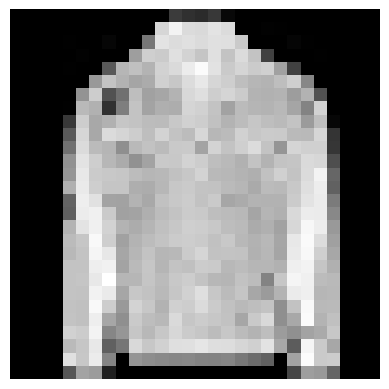

5


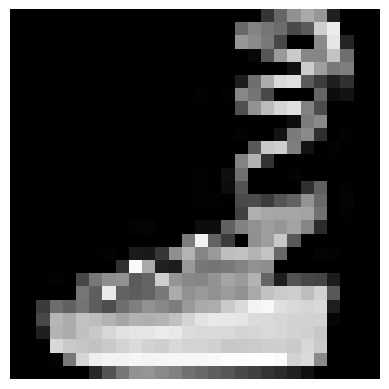

6


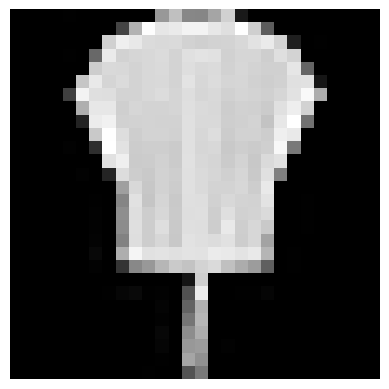

7


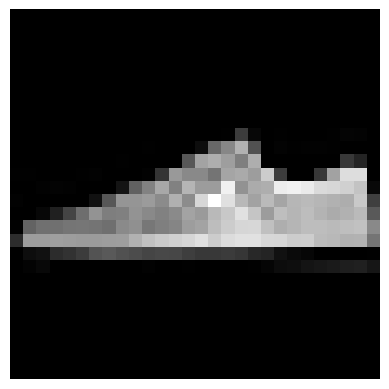

8


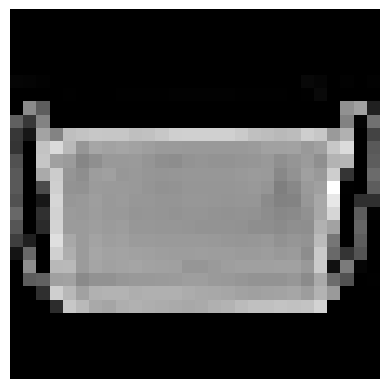

9


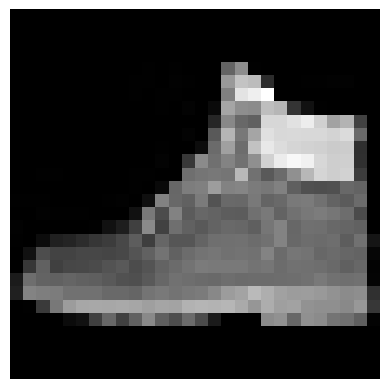

In [ ]:
for i in range(10):
    print(i)
    plt.imshow(train_x[train_y == i][i], cmap = 'gray')
    plt.axis('off')
    plt.show()